[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

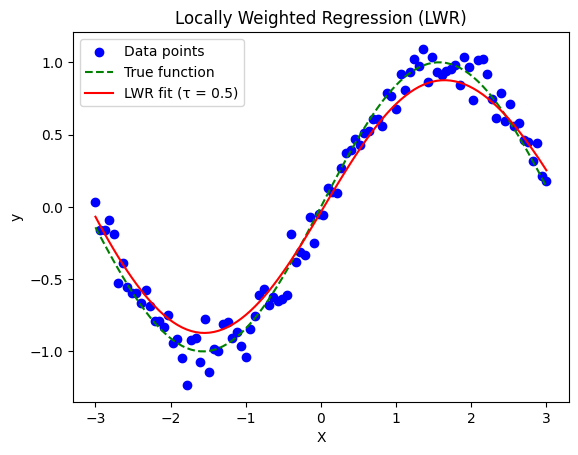

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.linspace(-3, 3, 100) 
y = np.sin(X) + np.random.normal(0, 0.1, 100)  
print(X,y)

X_bias = np.c_[np.ones(X.shape[0]), X]
print(X_bias)

def get_weights(query_point, X, tau):
    return np.exp(-np.square(X - query_point) / (2 * tau ** 2))

def locally_weighted_regression(X, y, tau):
    y_pred = np.zeros(X.shape)
    
    for i, x_query in enumerate(X):  
        W = np.diag(get_weights(x_query, X, tau)) 
        theta = np.linalg.pinv(X_bias.T @ W @ X_bias) @ X_bias.T @ W @ y 
        y_pred[i] = np.array([1, x_query]) @ theta 
    
    return y_pred

tau = 0.5 

y_pred = locally_weighted_regression(X, y, tau)

plt.scatter(X, y, color='blue', label="Data points")
plt.plot(X, np.sin(X), color='green', linestyle="dashed", label="True function")
plt.plot(X, y_pred, color='red', label="LWR fit (τ = 0.5)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Locally Weighted Regression (LWR)")
plt.show()